<a href="https://colab.research.google.com/github/djgarayb/INFg_Mtb_Ahmed_2022/blob/main/INFg_Mtb_project_April_2021_removing1sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# References

- Bray, N. L., Pimentel, H., Melsted, P., & Pachter, L. (2016). Near-optimal probabilistic RNA-seq quantification. Nature biotechnology, 34(5), 525-527.[link text](https://www.nature.com/articles/nbt.3519?report=reader)

- Ewels, P., Magnusson, M., Lundin, S., & Käller, M. (2016). MultiQC: summarize analysis results for multiple tools and samples in a single report. Bioinformatics, 32(19), 3047-3048.[link text](https://academic.oup.com/bioinformatics/article/32/19/3047/2196507)

- Pimentel, H., Bray, N. L., Puente, S., Melsted, P., & Pachter, L. (2017). Differential analysis of RNA-seq incorporating quantification uncertainty. Nature methods, 14(7), 687.[link text](https://www.nature.com/articles/nmeth.4324)

# Install packages

In [ ]:
!kallisto

In [ ]:
%cd bucket/Mo

/home/jupyter/bucket/Mo


# Get the cDNA file

In [ ]:
!mkdir index

In [ ]:
cd index

/home/jupyter/bucket/Mo/index


In [ ]:
%cd /home/jupyter/bucket/Mo/index

/home/jupyter/bucket/Mo/index


In [ ]:
!kallisto index --make-unique -i kallisto_index2.idx Mycobacterium_tuberculosis_h37rv.ASM19595v2.cdna.all.fa.gz


[build] loading fasta file Mycobacterium_tuberculosis_h37rv.ASM19595v2.cdna.all.fa.gz
[build] k-mer length: 31
[build] counting k-mers ... done.
[build] building target de Bruijn graph ...  done 
[build] creating equivalence classes ...  done
[build] target de Bruijn graph has 3917 contigs and contains 2830585 k-mers 



# Creating folder structure

In [ ]:
ls

Mycobacterium_tuberculosis_h37ra_gca_000016145.ASM1614v1.cdna.all.fa.gz
Mycobacterium_tuberculosis_h37rv.ASM19595v2.cdna.all.fa.gz
kallisto_index.idx
kallisto_index2.idx
log


In [ ]:
cd ..

/home/jupyter/bucket/Mo


In [ ]:
mkdir Kallisto_results2

In [ ]:
ls

Kallisto_results/  Kallisto_results2/  Mo_Seq_data_2021/  index/


# Alignment

In [ ]:
%%!
cd /home/jupyter/bucket/Mo/Mo_Seq_data_2021/
for DIR in $(ls -d */); do
  echo $DIR
  cd $DIR
  seq_file1=*_1.fastq.gz
  seq_file2=*_2.fastq.gz
  base=$(echo $seq_file1|awk '{print substr($0, 1, length()-11)}')
  echo $base
  echo "Running Kallisto with the following code"
  echo "kallisto quant -i /home/jupyter/bucket/Mo/index/kallisto_index2.idx -o /home/jupyter/bucket/Mo/Kallisto_results2/$DIR -t 16 --bias -b 50 $seq_file1 $seq_file2 >>log 2>&1"
  echo $seq_file1
  echo $seq_file2
  #kallisto quant -i /home/jupyter/index/kallisto_index.idx -o /home/jupyter/bucket/kallisto_test/$DIR -t 8 --bias --rf-stranded $seq_file1 $seq_file2
  kallisto quant -i /home/jupyter/bucket/Mo/index/kallisto_index2.idx -o /home/jupyter/bucket/Mo/Kallisto_results2/$DIR -t 16 --bias -b 50 $seq_file1 $seq_file2 >>log 2>&1
  cd ..
done

['C18A1/',
 'WTCHG_845237_70865062',
 'Running Kallisto with the following code',
 'kallisto quant -i /home/jupyter/bucket/Mo/index/kallisto_index2.idx -o /home/jupyter/bucket/Mo/Kallisto_results2/C18A1/ -t 16 --bias -b 50 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'WTCHG_845237_70865062_1.fastq.gz',
 'WTCHG_845237_70865062_2.fastq.gz',
 'C18A2/',
 'WTCHG_845237_70885064',
 'Running Kallisto with the following code',
 'kallisto quant -i /home/jupyter/bucket/Mo/index/kallisto_index2.idx -o /home/jupyter/bucket/Mo/Kallisto_results2/C18A2/ -t 16 --bias -b 50 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'WTCHG_845237_70885064_1.fastq.gz',
 'WTCHG_845237_70885064_2.fastq.gz',
 'C18A3/',
 'WTCHG_845237_70925068',
 'Running Kallisto with the following code',
 'kallisto quant -i /home/jupyter/bucket/Mo/index/kallisto_index2.idx -o /home/jupyter/bucket/Mo/Kallisto_results2/C18A3/ -t 16 --bias -b 50 *_1.fastq.gz *_2.fastq.gz >>log 2>&1',
 'WTCHG_845237_70925068_1.fastq.gz',
 'WTCHG_845237_70925068_2.fas

# QC

## FastQC

In [ ]:
pwd

In [ ]:
ls

In [ ]:
%%!
cd fastq
for DIR in $(ls -d */); do
  echo $DIR
  cd $DIR
  /content/FastQC/fastqc *.fastq.gz
  cd ..
done

In [ ]:
ls

## MultiQC

In [ ]:
pip install multiqc

In [ ]:
%cd /home/jupyter/bucket/Mo/

/home/jupyter/bucket/Mo


In [ ]:
!multiqc .

[INFO   ]         multiqc : This is MultiQC v1.10.1
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching   : /home/jupyter/bucket/Mo
Searching   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 190/190  
[INFO   ]        kallisto : Found 12 reports
[INFO   ]          fastqc : Found 24 reports
[INFO   ]         multiqc : Compressing plot data
[INFO   ]         multiqc : Report      : multiqc_report.html
[INFO   ]         multiqc : Data        : multiqc_data
[INFO   ]         multiqc : MultiQC complete


# Creating our gene expresssion matrix with R

## Load packages

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
# Load all the R libraries we will be using in the notebook
#library(tximport)
library(biomaRt)
library(Biobase)
library(ggplot2)
library(dplyr)
#library(tidyverse) 
library(Biostrings)
library(ensembldb)
#library(EnsDb.Hsapiens.v86) 
library(rhdf5)
library(gplots)
library(genefilter)


R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, w

## Set WD

In [ ]:
pwd

'/Users/andres'

In [ ]:
%cd /home/jupyter/bucket/Mo/Kallisto_results2

/home/jupyter/bucket/Mo/Kallisto_results2


In [ ]:
%%R
setwd("/home/jupyter/Dress/kalisto_results")

## T2G table 

In [ ]:
%%R
metadata<-read.csv("/home/jupyter/bucket/Mo/Mo_Seq_data_2021/metadata_Mo.csv")
metadata

                  sample  folder   group batch
1  WTCHG_845237_70015073 IFN18B4    infg  EXP4
2  WTCHG_845237_70865062   C18A1 control  EXP1
3  WTCHG_845237_70875063 IFN18A1    infg  EXP1
4  WTCHG_845237_70885064   C18A2 control  EXP2
5  WTCHG_845237_70895065   C18B2 control  EXP2
6  WTCHG_845237_70905066 IFN18A2    infg  EXP2
7  WTCHG_845237_70915067 IFN18B2    infg  EXP2
8  WTCHG_845237_70925068   C18A3 control  EXP3
9  WTCHG_845237_70935069   C18B3 control  EXP3
10 WTCHG_845237_70945070 IFN18A3    infg  EXP3
11 WTCHG_845237_70955071 IFN18B3    infg  EXP3
12 WTCHG_845237_70965072   C18B4 control  EXP4


In [ ]:
%%R
metadata<-read.csv("/home/jupyter/bucket/Mo/metadata_Mo3.csv")
metadata


                  sample  folder   group batch
1  WTCHG_845237_70015073 IFN18B4    infg  EXP4
2  WTCHG_845237_70865062   C18A1 control  EXP1
3  WTCHG_845237_70875063 IFN18A1    infg  EXP1
4  WTCHG_845237_70885064   C18A2 control  EXP2
5  WTCHG_845237_70895065   C18B2 control  EXP2
6  WTCHG_845237_70905066 IFN18A2    infg  EXP2
7  WTCHG_845237_70915067 IFN18B2    infg  EXP2
8  WTCHG_845237_70935069   C18B3 control  EXP3
9  WTCHG_845237_70955071 IFN18B3    infg  EXP3
10 WTCHG_845237_70965072   C18B4 control  EXP4


## Check paths

In [ ]:
%%R
metadata <- dplyr::mutate(metadata,path =file.path("/home/jupyter/bucket/Mo/Kallisto_results3",metadata$folder, "abundance.h5"))

In [ ]:
%%R
metadata <- dplyr::rename(metadata, Sample = sample)

In [ ]:
%%R
metadata <- dplyr::rename(metadata, sample = folder)

In [ ]:
%%R
metadata

                  Sample  sample   group batch
1  WTCHG_845237_70015073 IFN18B4    infg  EXP4
2  WTCHG_845237_70865062   C18A1 control  EXP1
3  WTCHG_845237_70875063 IFN18A1    infg  EXP1
4  WTCHG_845237_70885064   C18A2 control  EXP2
5  WTCHG_845237_70895065   C18B2 control  EXP2
6  WTCHG_845237_70905066 IFN18A2    infg  EXP2
7  WTCHG_845237_70915067 IFN18B2    infg  EXP2
8  WTCHG_845237_70935069   C18B3 control  EXP3
9  WTCHG_845237_70955071 IFN18B3    infg  EXP3
10 WTCHG_845237_70965072   C18B4 control  EXP4
                                                             path
1  /home/jupyter/bucket/Mo/Kallisto_results3/IFN18B4/abundance.h5
2    /home/jupyter/bucket/Mo/Kallisto_results3/C18A1/abundance.h5
3  /home/jupyter/bucket/Mo/Kallisto_results3/IFN18A1/abundance.h5
4    /home/jupyter/bucket/Mo/Kallisto_results3/C18A2/abundance.h5
5    /home/jupyter/bucket/Mo/Kallisto_results3/C18B2/abundance.h5
6  /home/jupyter/bucket/Mo/Kallisto_results3/IFN18A2/abundance.h5
7  /home/jupyter/buck

#Exploratory data analysis with Sleuth

In [ ]:
%%R
library(sleuth)

In [ ]:
%%R

so_GS1 <- sleuth_prep(metadata, extra_bootstrap_summary = TRUE,read_bootstrap_tpm = TRUE,num_cores=16)

R[write to console]: reading in kallisto results

R[write to console]: dropping unused factor levels

R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: .
R[write to console]: 

R[write to console]: normalizing est_counts

R[write to console]: 4125 targets passed the filter

R[write to console]: normalizing tpm

R[write to console]: merging in metadata

R[write to console]: summarizing bootstraps

R[write to console]: 



In [ ]:
%%R
saveRDS(so_GS1,"so_H37Rv_Mo_excluding1sample.rds")

In [ ]:
%%R
so_GS1 <- sleuth_fit(so_GS1, ~batch, 'reduced')
so_GS1<- sleuth_fit(so_GS1, ~batch +  group, 'full')
so_GS1<- sleuth_lrt(so_GS1, "reduced",'full')
models(so_GS1)

R[write to console]: fitting measurement error models

R[write to console]: shrinkage estimation

R[write to console]: 13 NA values were found during variance shrinkage estimation due to mean observation values outside of the range used for the LOESS fit.
The LOESS fit will be repeated using exact computation of the fitted surface to extrapolate the missing values.
These are the target ids with NA values: MTB000023, MTB000046, MTB000047, MTB000069, MTB000140, MTB000146, MTB000150, Rv3022c, Rv3599c, MTB000020, MTB000026, MTB000042, MTB000078

R[write to console]: computing variance of betas

R[write to console]: fitting measurement error models

R[write to console]: shrinkage estimation

R[write to console]: 16 NA values were found during variance shrinkage estimation due to mean observation values outside of the range used for the LOESS fit.
The LOESS fit will be repeated using exact computation of the fitted surface to extrapolate the missing values.
These are the target ids with NA v

[  reduced  ]
formula:  ~batch 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	batchEXP2
 	batchEXP3
 	batchEXP4
[  full  ]
formula:  ~batch + group 
data modeled:  obs_counts 
transform sync'ed:  TRUE 
coefficients:
	(Intercept)
 	batchEXP2
 	batchEXP3
 	batchEXP4
 	groupinfg


In [ ]:
%%R
full_results_GS_lrt1 <- sleuth_results(so_GS1, 'reduced:full', "lrt",show_all = FALSE)

In [ ]:
%%R
sleuth_significant_GS_lrt1 <- dplyr::filter(full_results_GS_lrt1, pval <= 0.01)
dim(sleuth_significant_GS_lrt1)

[1] 151  12


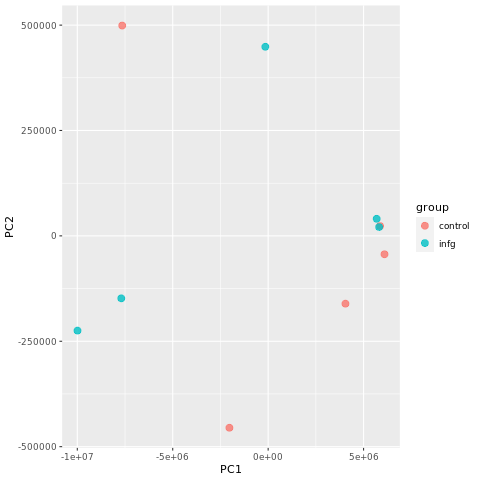

In [ ]:
%%R
plot_pca(so_GS1, color_by = 'group', units='est_counts')

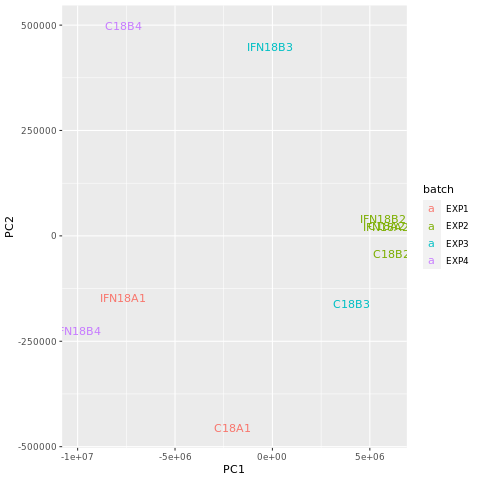

In [ ]:
%%R
new_position_theme <- theme(legend.position = c(0.80, 0.90))
plot_pca(so_GS1, color_by = 'batch', text_labels = TRUE,units="est_counts")

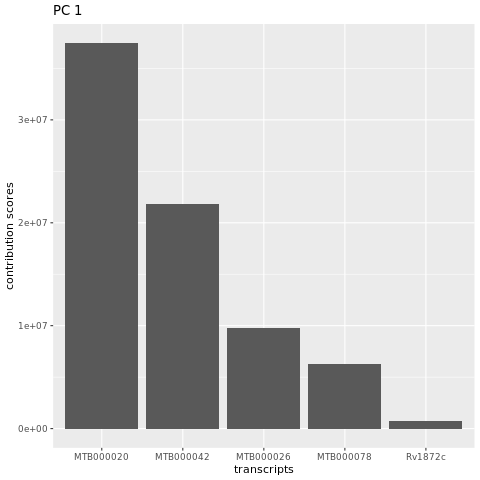

In [ ]:
%%R
plot_loadings(so_GS1, pc_input = 1, units='est_counts')

In [ ]:
%%R
sleuth_significant_GS_lrt1

In [ ]:
%%R
so_GS1<- sleuth_wt(so_GS1, "groupinfg",which_model = "full")
full_results_EN_wt1 <- sleuth_results(so_GS1,'groupinfg',test_type = "wt", which_model = "full",show_all = FALSE, pval_aggregate = F)

head(full_results_EN_wt1)

  target_id         pval         qval           b       se_b mean_obs
1    Rv3561 3.393189e-08 0.0001399691 -0.16557227 0.02999588 7.268993
2 MTB000021 2.802497e-05 0.0385343273  0.14042064 0.03352169 8.687595
3    Rv0188 2.562804e-05 0.0385343273  0.12878192 0.03059537 9.614959
4    Rv0088 8.046673e-05 0.0623574157  0.09211148 0.02336073 8.391284
5    Rv0393 6.375713e-05 0.0623574157 -0.12642120 0.03161751 7.346209
6    Rv0747 1.058186e-04 0.0623574157 -0.09506887 0.02452221 8.020098
     var_obs     tech_var     sigma_sq smooth_sigma_sq final_sigma_sq
1 0.20385979 7.937699e-04 0.0011098002     0.001455611    0.001455611
2 0.04379352 1.898826e-04 0.0026193767     0.001095516    0.002619377
3 0.21166836 7.174815e-05 0.0022684433     0.001175341    0.002268443
4 0.02758942 2.132530e-04 0.0011510561     0.001126613    0.001151056
5 0.03280812 6.904292e-04 0.0018087376     0.001413457    0.001808738
6 0.01307557 3.170471e-04 0.0007848451     0.001186300    0.001186300


In [ ]:
%%R
sleuth_significant_EN_wt1 <- dplyr::filter(full_results_EN_wt1, pval <= 0.05)
head(sleuth_significant_EN_wt1, 20)

   target_id         pval         qval           b       se_b mean_obs
1     Rv3561 3.393189e-08 0.0001399691 -0.16557227 0.02999588 7.268993
2  MTB000021 2.802497e-05 0.0385343273  0.14042064 0.03352169 8.687595
3     Rv0188 2.562804e-05 0.0385343273  0.12878192 0.03059537 9.614959
4     Rv0088 8.046673e-05 0.0623574157  0.09211148 0.02336073 8.391284
5     Rv0393 6.375713e-05 0.0623574157 -0.12642120 0.03161751 7.346209
6     Rv0747 1.058186e-04 0.0623574157 -0.09506887 0.02452221 8.020098
7    Rv1686c 9.315504e-05 0.0623574157 -0.20216874 0.05173517 6.566017
8    Rv1845c 1.553001e-04 0.0640612892 -0.09874930 0.02610732 8.731221
9    Rv3559c 1.410379e-04 0.0640612892 -0.15346626 0.04031858 6.354793
10    Rv3562 1.458354e-04 0.0640612892 -0.13456889 0.03543099 6.838561
11   Rv1884c 4.387097e-04 0.1569678094  0.09297878 0.02644725 9.045027
12    Rv3281 4.566336e-04 0.1569678094  0.07778371 0.02219231 8.863039
13   Rv0869c 6.214602e-04 0.1923002417 -0.09405079 0.02748359 8.353565
14    

In [ ]:
%%R
sleuth_significant_EN_wt1 <- dplyr::filter(full_results_EN_wt1, qval <= 0.1)
head(sleuth_significant_EN_wt1, 20)

   target_id         pval         qval           b       se_b mean_obs
1     Rv3561 3.393189e-08 0.0001399691 -0.16557227 0.02999588 7.268993
2  MTB000021 2.802497e-05 0.0385343273  0.14042064 0.03352169 8.687595
3     Rv0188 2.562804e-05 0.0385343273  0.12878192 0.03059537 9.614959
4     Rv0088 8.046673e-05 0.0623574157  0.09211148 0.02336073 8.391284
5     Rv0393 6.375713e-05 0.0623574157 -0.12642120 0.03161751 7.346209
6     Rv0747 1.058186e-04 0.0623574157 -0.09506887 0.02452221 8.020098
7    Rv1686c 9.315504e-05 0.0623574157 -0.20216874 0.05173517 6.566017
8    Rv1845c 1.553001e-04 0.0640612892 -0.09874930 0.02610732 8.731221
9    Rv3559c 1.410379e-04 0.0640612892 -0.15346626 0.04031858 6.354793
10    Rv3562 1.458354e-04 0.0640612892 -0.13456889 0.03543099 6.838561
      var_obs     tech_var     sigma_sq smooth_sigma_sq final_sigma_sq
1  0.20385979 7.937699e-04 0.0011098002     0.001455611    0.001455611
2  0.04379352 1.898826e-04 0.0026193767     0.001095516    0.002619377
3  0.2

In [ ]:
%%R
write.csv(sleuth_significant_EN_wt1,'Significants_gene_sleuth_wt_pvalue_removing1sample.csv')

In [ ]:
%%R
write.csv(sleuth_significant_EN_wt1,'Significant_gene_sleuth_wt_qvalue_removing1sample.csv')

In [ ]:
%%R
dim(sleuth_significant_EN_wt1)

[1] 338  11


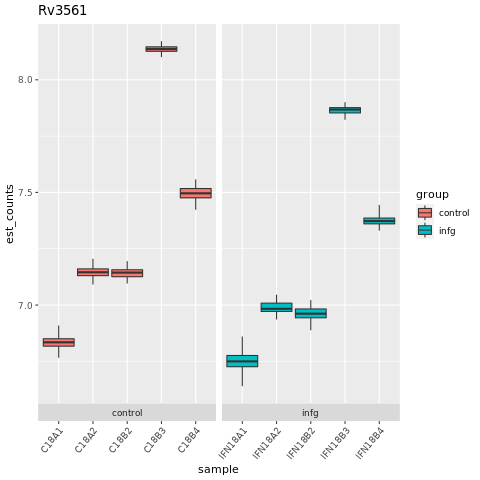

In [ ]:
%%R

plot_bootstrap(so_GS1, "Rv3561", units = "est_counts", color_by = "group")


In [ ]:
%%R
sleuth_matrix <- sleuth_to_matrix(so_GS1, 'obs_norm', 'tpm')

In [ ]:
%%R
write.csv(sleuth_matrix,"norm_tpm.csv")

In [ ]:
%%R
select_var<- sleuth_significant_GS_lrt1[!duplicated(sleuth_significant_GS_lrt1$target_id), ]
select_var<-select_var$target_id

In [ ]:
%%R
select_var

  [1] "Rv3561"    "MTB000021" "Rv0088"    "Rv0188"    "Rv0393"    "Rv0747"   
  [7] "Rv1686c"   "Rv1845c"   "Rv3559c"   "Rv3562"    "Rv0114"    "Rv0190"   
 [13] "Rv0229c"   "Rv0389"    "Rv0413"    "Rv0415"    "Rv0450c"   "Rv0478"   
 [19] "Rv0572c"   "Rv0741"    "Rv0869c"   "Rv0877"    "Rv0988"    "Rv1005c"  
 [25] "Rv1080c"   "Rv1091"    "Rv1185c"   "Rv1238"    "Rv1448c"   "Rv1501"   
 [31] "Rv1687c"   "Rv1739c"   "Rv1876"    "Rv1883c"   "Rv1884c"   "Rv1953"   
 [37] "Rv2153c"   "Rv2158c"   "Rv2161c"   "Rv2243"    "Rv2347c"   "Rv2349c"  
 [43] "Rv2677c"   "Rv2743c"   "Rv2818c"   "Rv2819c"   "Rv2937"    "Rv2945c"  
 [49] "Rv3109"    "Rv3136"    "Rv3190A"   "Rv3281"    "Rv3354"    "Rv3450c"  
 [55] "Rv3548c"   "Rv3549c"   "Rv3556c"   "Rv3824c"   "Rv0590"    "Rv3425"   
 [61] "Rv1333"    "Rv0568"    "Rv0061c"   "Rv2802c"   "Rv2389c"   "Rv0011c"  
 [67] "Rv0156"    "Rv0192"    "Rv0637"    "Rv1505c"   "Rv1835c"   "Rv1950c"  
 [73] "Rv2614A"   "Rv1004c"   "Rv0169"    "Rv2250c"   "Rv2729c" 

In [ ]:
%%R
sleuth_matrix <- sleuth_to_matrix(so_GS1, 'obs_norm', 'tpm')
LogData <- log2(sleuth_matrix+1)

In [ ]:
%%R
highly_variable <- LogData[select_var,]
dim(highly_variable)

[1] 151  10


In [ ]:
%%R
#begin by clustering the genes (rows) in each set of differentially expressed genes
hr <- hclust(as.dist(1-cor(t(highly_variable), method="pearson")), method="ward.D2") #cluster rows by

#now cluster your samples (columns)
hc <- hclust(as.dist(1-cor(highly_variable, method="pearson")), method="ward.D2")

#the agglomeration method to be used. This should be (an unambiguous abbreviation of)one of
#  "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) or "centroid" (= UPGMC).

mycl <- cutree(hr, k=2)
#now assign a color to each cluster (makes it easy to identify and manipulate)
mycolhc <- rainbow(length(unique(mycl)), start=0.1, end=0.9) 
mycolhc <- mycolhc[as.vector(mycl)] 

In [ ]:
%%R
library('RColorBrewer')
mypalette <- brewer.pal(10,"RdYlBu")
morecols <- colorRampPalette(mypalette)
Colors<-brewer.pal(3,"Set2")

In [ ]:
%%R
metadata

                  Sample  sample   group batch
1  WTCHG_845237_70015073 IFN18B4    infg  EXP4
2  WTCHG_845237_70865062   C18A1 control  EXP1
3  WTCHG_845237_70875063 IFN18A1    infg  EXP1
4  WTCHG_845237_70885064   C18A2 control  EXP2
5  WTCHG_845237_70895065   C18B2 control  EXP2
6  WTCHG_845237_70905066 IFN18A2    infg  EXP2
7  WTCHG_845237_70915067 IFN18B2    infg  EXP2
8  WTCHG_845237_70935069   C18B3 control  EXP3
9  WTCHG_845237_70955071 IFN18B3    infg  EXP3
10 WTCHG_845237_70965072   C18B4 control  EXP4
                                                             path
1  /home/jupyter/bucket/Mo/Kallisto_results3/IFN18B4/abundance.h5
2    /home/jupyter/bucket/Mo/Kallisto_results3/C18A1/abundance.h5
3  /home/jupyter/bucket/Mo/Kallisto_results3/IFN18A1/abundance.h5
4    /home/jupyter/bucket/Mo/Kallisto_results3/C18A2/abundance.h5
5    /home/jupyter/bucket/Mo/Kallisto_results3/C18B2/abundance.h5
6  /home/jupyter/bucket/Mo/Kallisto_results3/IFN18A2/abundance.h5
7  /home/jupyter/buck

In [ ]:
%%R
colnames(highly_variable)

 [1] "C18A1"   "C18A2"   "C18B2"   "C18B3"   "C18B4"   "IFN18A1" "IFN18A2"
 [8] "IFN18B2" "IFN18B3" "IFN18B4"


In [ ]:
%%R
highly_variable <- highly_variable[,metadata$sample]

In [ ]:
%%R
colnames(highly_variable)

 [1] "IFN18B4" "C18A1"   "IFN18A1" "C18A2"   "C18B2"   "IFN18A2" "IFN18B2"
 [8] "C18B3"   "IFN18B3" "C18B4"  


In [ ]:
%%R
metadata$sample

 [1] "IFN18B4" "C18A1"   "IFN18A1" "C18A2"   "C18B2"   "IFN18A2" "IFN18B2"
 [8] "C18B3"   "IFN18B3" "C18B4"  


In [ ]:
%%R
group <- factor(metadata$group)

#group <- factor(metadata1$group)
#infection <- factor(metadata1$case_control)
print(group)
#treatment<- factor(metadata1$treatment)
#print(treatment)


col.cell <- brewer.pal(9,"Set1")[group]
col.cell

 [1] infg    control infg    control control infg    infg    control infg   
[10] control
Levels: control infg
 [1] "#377EB8" "#E41A1C" "#377EB8" "#E41A1C" "#E41A1C" "#377EB8" "#377EB8"
 [8] "#E41A1C" "#377EB8" "#E41A1C"


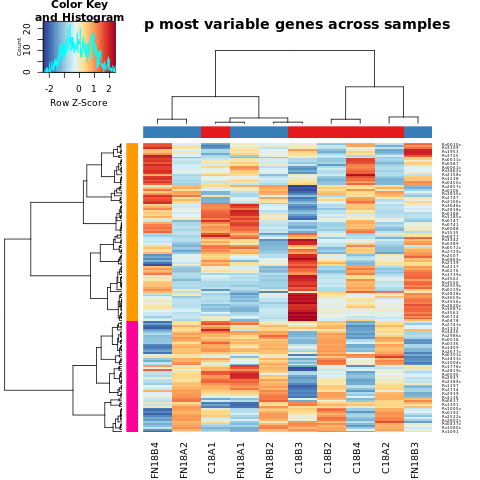

In [ ]:
%%R
out<-heatmap.2(highly_variable,col=rev(morecols(200)),trace="none", main="Top most variable genes across samples",
          ColSideColors=col.cell,scale="row",hclustfun = hclust,RowSideColors=mycolhc,Rowv=as.dendrogram(hr),Colv=as.dendrogram(hc),cexRow = 0.5)

In [ ]:
%%R
pdf("Bach.pdf")
out<-heatmap.2(highly_variable,col=rev(morecols(200)),trace="none", main="Top most variable genes across samples",
          ColSideColors=col.cell,scale="row",hclustfun = hclust,RowSideColors=mycolhc,Rowv=as.dendrogram(hr),Colv=as.dendrogram(hc),cexRow = 0.5)
dev.off()

png 
  2 


In [ ]:
%%R
logcounts1 <- cpm(dge,log=TRUE)
boxplot(logcounts1, xlab="", ylab="Log2 counts per million",las=2,col=col.cell)
abline(h=median(logcounts1),col="blue")
title("Boxplots of logCPMs (unnormalized)")

R[write to console]: Error in cpm(dge, log = TRUE) : could not find function "cpm"

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  library ‘/usr/lib/R/site-library’ contains no packages

R[write to console]: 2: `select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated. 




Error in cpm(dge, log = TRUE) : could not find function "cpm"


In [ ]:
%%R
logcounts1 <- cpm(dge_norm_filt,log=TRUE)
boxplot(logcounts1, xlab="", ylab="Log2 counts per million",las=2,col=col.cell)
abline(h=median(logcounts1),col="blue")
title("Boxplots of logCPMs (normalized)")

R[write to console]: Error in cpm(dge_norm_filt, log = TRUE) : could not find function "cpm"




Error in cpm(dge_norm_filt, log = TRUE) : could not find function "cpm"


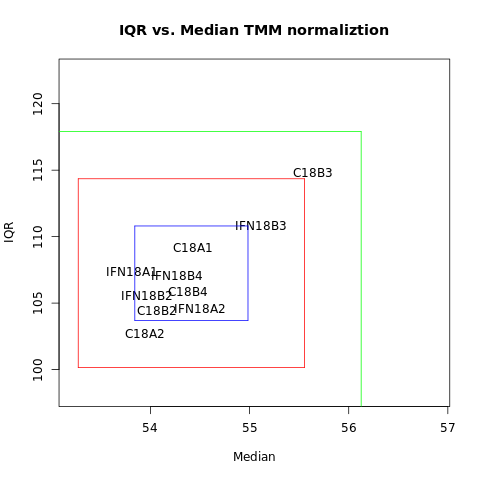

In [ ]:
%%R
#  Make IQR_Median Plots
counts_filtered <- dge_norm_filt$counts
log_counts<-log(counts_filtered+1)
CPM<-cpm(dge_norm_filt)

IQR<-apply(CPM, 2, IQR)
Median<-apply(CPM, 2, median)
diff1<-mean(Median)-min(Median)
diff2<-max(Median)-mean(Median)
diff3<-mean(IQR)-min(IQR)
diff4<-max(IQR)-mean(IQR)

#  These plot settings work for this data and may need to be adjusted for your own data.  
Xlim=c(mean(Median)-2*diff1,mean(Median)+2*diff2)
Ylim=c(mean(IQR)-2*diff3,mean(IQR)+2*diff4)


plot(Median, IQR, main="IQR vs. Median TMM normaliztion", type="n", xlim=Xlim,ylim=Ylim)
text(Median, IQR, labels=names(IQR))

#  Make boxes for StDev.
Median_mean<-mean(Median)  
c_sd1_mean<-sd(Median)
c_sd2_mean<-2*sd(Median)
c_sd3_mean<-3*sd(Median)
IQR_mean<-mean(IQR)
c_sd1_IQR<-sd(IQR)
c_sd2_IQR<-2*sd(IQR)
c_sd3_IQR<-3*sd(IQR)

x0_c<-Median_mean-c_sd1_mean
y0_c<-IQR_mean-c_sd1_IQR
x1_c<-Median_mean+c_sd1_mean
y1_c<-IQR_mean+c_sd1_IQR

x0_c.2<-Median_mean-c_sd2_mean
y0_c.2<-IQR_mean-c_sd2_IQR
x1_c.2<-Median_mean+c_sd2_mean
y1_c.2<-IQR_mean+c_sd2_IQR

x0_c.3<-Median_mean-c_sd3_mean
y0_c.3<-IQR_mean-c_sd3_IQR
x1_c.3<-Median_mean+c_sd3_mean
y1_c.3<-IQR_mean+c_sd3_IQR

segments(x0_c,y0_c, x1=x1_c, y1=y0_c, col="blue")
segments(x0_c,y0_c, x1=x0_c, y1=y1_c, col="blue")
segments(x1_c,y0_c, x1=x1_c, y1=y1_c, col="blue")
segments(x0_c,y1_c, x1=x1_c, y1=y1_c, col="blue")

segments(x0_c.2,y0_c.2, x1=x1_c.2, y1=y0_c.2, col="red")
segments(x0_c.2,y0_c.2, x1=x0_c.2, y1=y1_c.2, col="red")
segments(x1_c.2,y0_c.2, x1=x1_c.2, y1=y1_c.2, col="red")
segments(x0_c.2,y1_c.2, x1=x1_c.2, y1=y1_c.2, col="red")

#  This portion is out of range so I removed it.  
segments(x0_c.3,y0_c.3, x1=x1_c.3, y1=y0_c.3, col="green")
segments(x0_c.3,y0_c.3, x1=x0_c.3, y1=y1_c.3, col="green")
segments(x1_c.3,y0_c.3, x1=x1_c.3, y1=y1_c.3, col="green")
segments(x0_c.3,y1_c.3, x1=x1_c.3, y1=y1_c.3, col="green")


# Batch correction

In [ ]:
%%R
sleuth_matrix <- sleuth_to_matrix(so_GS1, 'obs_raw', 'est_counts')

In [ ]:
%%R
sleuth_matrix <- sleuth_matrix[,metadata$sample]

In [ ]:
%%R
colnames(sleuth_matrix)

 [1] "IFN18B4" "C18A1"   "IFN18A1" "C18A2"   "C18B2"   "IFN18A2" "IFN18B2"
 [8] "C18B3"   "IFN18B3" "C18B4"  


In [ ]:
%%R
group <- factor(metadata$group)
design <- model.matrix(~0+group)
print(design)
colnames(design)

   groupcontrol groupinfg
1             0         1
2             1         0
3             0         1
4             1         0
5             1         0
6             0         1
7             0         1
8             1         0
9             0         1
10            1         0
attr(,"assign")
[1] 1 1
attr(,"contrasts")
attr(,"contrasts")$group
[1] "contr.treatment"

[1] "groupcontrol" "groupinfg"   


In [ ]:
%R require(limma)
%R require(edgeR)

1


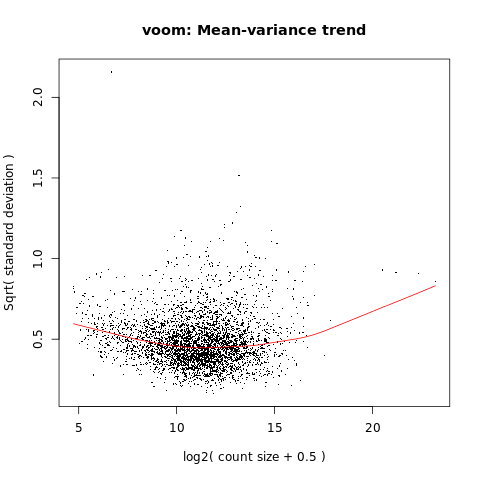

In [ ]:
%%R
dge <- DGEList(counts= sleuth_matrix,genes=row.names(sleuth_matrix))
dge_norm <- calcNormFactors(dge,lib.size=T,method="TMM")
cpm.count <- cpm(dge_norm)
keep = rowSums(cpm.count > as.numeric(1) ) >= as.numeric(1)
dge_norm_filt <- dge_norm[keep,,keep.lib.sizes=FALSE]

#print(dim(dge_norm))
v <-  voom(dge_norm_filt, design=design, plot=TRUE)

#voom_dataframe <- as.data.frame(v)

In [ ]:
%%R
dim(v)

[1] 4072   10


In [ ]:
%%R -o logCPM_no_batch
CPM <- cpm(dge_norm_filt)
logCPM <- log2(CPM+1)
batch <- metadata$batch
print(batch)
design
# Remove batch effect. 
logCPM_no_batch <- removeBatchEffect(logCPM, batch=batch, design=design)
dim(logCPM_no_batch)

 [1] "EXP4" "EXP1" "EXP1" "EXP2" "EXP2" "EXP2" "EXP2" "EXP3" "EXP3" "EXP4"
[1] 4072   10


In [ ]:
%%R
logCPM_no_batch[1:5,1:5]

           IFN18B4    C18A1  IFN18A1    C18A2    C18B2
MTB000001 1.976315 2.159187 1.805325 1.865203 2.067794
MTB000002 2.908109 2.843464 2.917263 2.985750 2.857732
MTB000003 3.596350 3.549892 3.580438 3.766236 3.529947
MTB000004 1.969732 1.785875 1.971085 1.939099 1.874109
MTB000006 2.452270 2.277625 2.441316 2.313987 2.395873


In [ ]:
%%R
data<- 2^logCPM_no_batch

In [ ]:
%%R
data[1:5,1:5]

            IFN18B4     C18A1   IFN18A1     C18A2     C18B2
MTB000001  3.934869  4.466631  3.495078  3.643191  4.192450
MTB000002  7.506335  7.177413  7.554115  7.921371  7.248747
MTB000003 12.095092 11.711812 11.962427 13.606611 11.551010
MTB000004  3.916954  3.448275  3.920629  3.834661  3.665751
MTB000006  5.472767  4.848789  5.431371  4.972554  5.262956


In [ ]:
%%R

cpm<-logCPM_no_batch

Y <- apply(cpm, 1, function(y) scale(y, center=TRUE, scale=FALSE))
s <- svd(Y)
#  Get Variance explained by the components
Var1<-s$d^2/sum(s$d^2)
Var2<-cumsum(s$d^2/sum(s$d^2))
Var<-cbind(Var1,Var2)
Var<-round(Var,3)
colnames(Var)<-c("Percent Variance","Cumulative % Variance")
head(Var)

     Percent Variance Cumulative % Variance
[1,]            0.357                 0.357
[2,]            0.278                 0.635
[3,]            0.141                 0.776
[4,]            0.104                 0.879
[5,]            0.066                 0.946
[6,]            0.054                 1.000


In [ ]:
%%R
group <- factor(metadata$group)

#group <- factor(metadata1$group)
#infection <- factor(metadata1$case_control)
print(group)
#treatment<- factor(metadata1$treatment)
#print(treatment)


col.cell <- brewer.pal(9,"Set1")[group]
col.cell

 [1] infg    control infg    control control infg    infg    control infg   
[10] control
Levels: control infg
 [1] "#377EB8" "#E41A1C" "#377EB8" "#E41A1C" "#E41A1C" "#377EB8" "#377EB8"
 [8] "#E41A1C" "#377EB8" "#E41A1C"


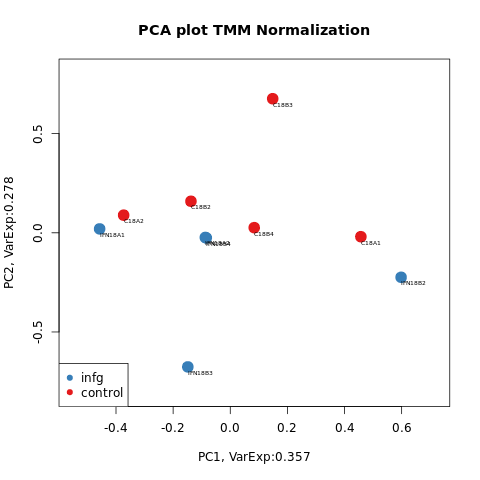

In [ ]:
%%R
plot(s$u[,1], s$u[,2], pch=19, cex=2, xlab=paste0("PC1, VarExp:", round(Var[1],3)), ylab=paste0("PC2, VarExp:", round(Var[2],3)),main="PCA plot TMM Normalization",col=col.cell, ylim=c((min(s$u[,2])*1.2),(max(s$u[,2])*1.2)),xlim=c((min(s$u[,1])*1.2),(max(s$u[,1])*1.2)))
text(s$u[,1], s$u[,2], labels=colnames(cpm),adj=c(0,2),cex=0.5)
legend("bottomleft",legend = unique(metadata$group),col = unique(col.cell), pch=19,cex=1)

In [ ]:
%%R
pdf("PCA_norm_batchcorrected_removing1sample.pdf")
plot(s$u[,1], s$u[,2], pch=19, cex=2, xlab=paste0("PC1, VarExp:", round(Var[1],3)), ylab=paste0("PC2, VarExp:", round(Var[2],3)),main="PCA plot TMM Normalization",col=col.cell, ylim=c((min(s$u[,2])*1.2),(max(s$u[,2])*1.2)),xlim=c((min(s$u[,1])*1.2),(max(s$u[,1])*1.2)))
text(s$u[,1], s$u[,2], labels=colnames(cpm),adj=c(0,2),cex=0.5)
legend("bottomleft",legend = unique(metadata$group),col = unique(col.cell), pch=19,cex=1)
dev.off()  

png 
  2 


#Limma

In [ ]:
%%R
group <- factor(metadata$group)
batch <- factor(metadata$batch)
design <- model.matrix(~batch+group)
print(design)
colnames(design)

   (Intercept) batchEXP2 batchEXP3 batchEXP4 groupinfg
1            1         0         0         1         1
2            1         0         0         0         0
3            1         0         0         0         1
4            1         1         0         0         0
5            1         1         0         0         0
6            1         1         0         0         1
7            1         1         0         0         1
8            1         0         1         0         0
9            1         0         1         0         1
10           1         0         0         1         0
attr(,"assign")
[1] 0 1 1 1 2
attr(,"contrasts")
attr(,"contrasts")$batch
[1] "contr.treatment"

attr(,"contrasts")$group
[1] "contr.treatment"

[1] "(Intercept)" "batchEXP2"   "batchEXP3"   "batchEXP4"   "groupinfg"  


In [ ]:
%%R
colnames(design)

[1] "(Intercept)" "batchEXP2"   "batchEXP3"   "batchEXP4"   "groupinfg"  


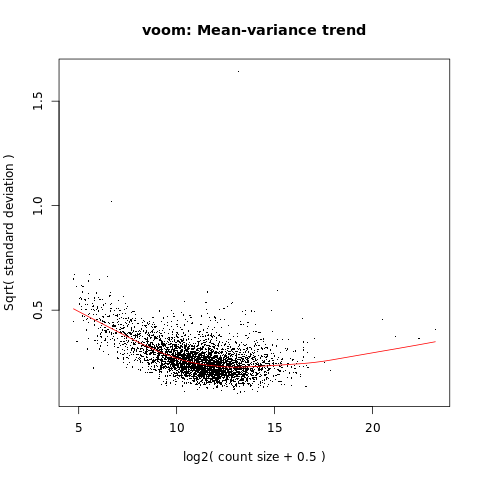

In [ ]:
%%R
dge <- DGEList(counts= sleuth_matrix,genes=row.names(sleuth_matrix))
dge_norm <- calcNormFactors(dge,lib.size=T,method="TMM")
cpm.count <- cpm(dge_norm)
keep = rowSums(cpm.count > as.numeric(1) ) >= as.numeric(1)
dge_norm_filt <- dge_norm[keep,,keep.lib.sizes=FALSE]

#print(dim(dge_norm))
v <-  voom(dge_norm_filt, design=design, plot=TRUE)

#voom_dataframe <- as.data.frame(v)

In [ ]:
%%R
fit <- lmFit(v, design)
fit <- eBayes(fit)
topTable(fit, coef="groupinfg")

              genes      logFC  AveExpr         t      P.Value adj.P.Val
Rv3561       Rv3561 -0.2548745 5.083035 -6.172234 4.266803e-05 0.1737442
MTB000021 MTB000021  0.2031469 7.129634  5.031467 2.709787e-04 0.2892276
Rv0188       Rv0188  0.1858436 8.467538  4.897767 3.405432e-04 0.2892276
Rv1686c     Rv1686c -0.3467938 4.068901 -5.471002 1.300893e-04 0.2648619
Rv1687c     Rv1687c -0.3168463 4.604360 -4.873359 3.551420e-04 0.2892276
Rv2620c     Rv2620c -0.3337410 5.129669 -4.412135 7.966081e-04 0.4911804
Rv2347c     Rv2347c  0.1812558 6.892021  4.142652 1.292674e-03 0.4911804
Rv2618       Rv2618 -0.2267894 5.307860 -4.159613 1.253579e-03 0.4911804
Rv3562       Rv3562 -0.2097758 4.462048 -4.210343 1.143773e-03 0.4911804
Rv1845c     Rv1845c -0.1414534 7.192577 -4.009064 1.648179e-03 0.4911804
                    B
Rv3561     1.51319427
MTB000021  0.53090624
Rv0188     0.33550455
Rv1686c    0.31950544
Rv1687c   -0.09183682
Rv2620c   -0.54783702
Rv2347c   -0.77032854
Rv2618    -0.85909907

#EDGER

In [ ]:
%%R
dge_norm <- estimateGLMCommonDisp(dge_norm, design, verbose=TRUE)
dge_norm<- estimateGLMTrendedDisp(dge_norm, design)
dge_norm<- estimateGLMTagwiseDisp(dge_norm, design)

dge.fit <- glmFit(dge_norm, design)

Disp = 0.00347 , BCV = 0.0589 


In [ ]:
%%R
dge_norm <- estimateCommonDisp(dge_norm, design, verbose=TRUE)

dge.fit <- glmFit(dge_norm, design)

Disp = 0.60835 , BCV = 0.78 


In [ ]:
%%R
dge.lrt <- glmLRT(dge.fit,coef="groupinfg")

In [ ]:
%%R
print(topTags(dge.lrt))
summary(decideTests(dge.lrt))

Coefficient:  groupinfg 
              genes      logFC   logCPM       LR       PValue          FDR
Rv3561       Rv3561 -0.2463541 5.224387 29.08184 6.938421e-08 0.0002905117
Rv1686c     Rv1686c -0.3101670 4.340593 22.87770 1.726431e-06 0.0028003147
MTB000021 MTB000021  0.2039587 7.156781 22.58887 2.006435e-06 0.0028003147
Rv1687c     Rv1687c -0.2866109 4.927323 18.74394 1.494977e-05 0.0156486729
Rv2620c     Rv2620c -0.3096978 5.484157 15.95457 6.488080e-05 0.0543311787
Rv2347c     Rv2347c  0.1821112 6.940971 15.33315 9.012098e-05 0.0628894219
Rv3559c     Rv3559c -0.2261529 3.789828 14.72789 1.241954e-04 0.0742866146
Rv3562       Rv3562 -0.2002358 4.543133 13.98590 1.841872e-04 0.0914566943
Rv2618       Rv2618 -0.2064478 5.443283 13.71596 2.126401e-04 0.0914566943
Rv0393       Rv0393 -0.1755607 5.223238 13.56322 2.306615e-04 0.0914566943
       groupinfg
Down           3
NotSig      4183
Up             1


In [ ]:
%%R
reads.cpm <- cpm(dge_norm)
unfiltered.results <- data.frame(id=dge_norm$genes, reads.cpm, dge.lrt$table)

In [ ]:
%%R
filter <- apply(X=reads.cpm, MARGIN=1,
                FUN=function(data) {data[order(rank(data), decreasing=TRUE)[2]]})

In [ ]:
%%R
library(genefilter)

In [ ]:
%%R
lowerQuantile <- mean(filter == 0)
if (lowerQuantile < .95) upperQuantile <- .95 else upperQuantile <- 1
theta <- seq(lowerQuantile, upperQuantile, length=50)

filtPadj <- filtered_p(filter=filter, test=unfiltered.results$PValue,
                       theta=theta, method="BH")

min.fdr <- 0.05
numRej <- colSums(filtPadj < min.fdr, na.rm = TRUE)

filter.quantiles <- quantile(filter, probs=theta)

lo.fit.theta <- lowess(numRej ~ theta, f=1/5)

if (max(numRej) <= 10) {
  j <- 1
} else {
  residual <- if (all(numRej==0)) {
    0
  } else {
    numRej[numRej > 0] - lo.fit.theta$y[numRej > 0]
  }
  thresh <- max(lo.fit.theta$y) - sqrt(mean(residual^2))
  j <- if (any(numRej > thresh)) {
    which(numRej > thresh)[1]
  } else {
    1
  }
}


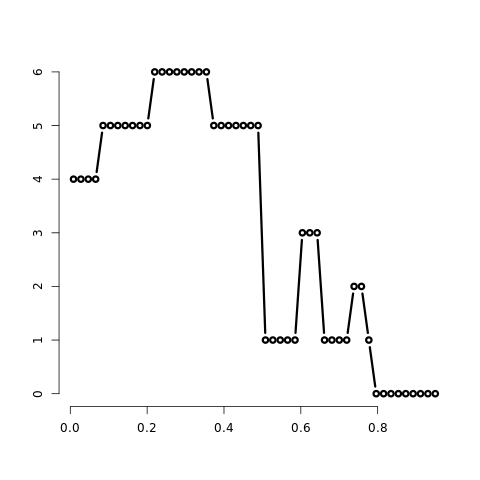

In [ ]:
%%R
plot(theta, numRej, type="b", xlab="", ylab="", lwd=3,
     frame.plot=FALSE, col="black")

In [ ]:
%%R -o results
results <- unfiltered.results
results$FDR <- filtPadj[, j, drop=TRUE]

results$de <- sign(results$logFC)*(results$FDR < 0.05)
results$sig <- abs(results$de)

results[is.na(results$sig),]$sig <- 0

In [ ]:
%%R 
print(dim(results[results$sig==1,]))
head(results[results$sig==1,])

[1]  4 18
              genes   IFN18B4      C18A1    IFN18A1     C18A2     C18B2
MTB000021 MTB000021 193.21311 150.463370 177.345519 120.30524 116.70945
Rv1686c     Rv1686c  15.65082   9.040289   7.875697  16.47472  15.81817
Rv1687c     Rv1687c  25.83628  11.512633   9.963231  24.42948  23.12168
Rv3561       Rv3561  38.19546  21.951420  19.863204  30.08154  30.00314
            IFN18A2   IFN18B2     C18B3   IFN18B3     C18B4      logFC   logCPM
MTB000021 133.72866 127.16688 100.32492 131.69032 178.08771  0.2039587 7.156781
Rv1686c    13.70094  12.38235  55.71255  38.37003  16.68652 -0.3101670 4.340593
Rv1687c    18.56618  17.74187  85.32087  62.34833  24.57172 -0.2866109 4.927323
Rv3561     25.51917  25.01671  79.62967  61.15893  42.66514 -0.2463541 5.224387
                LR       PValue          FDR de sig
MTB000021 22.58887 2.006435e-06 0.0027769063  1   1
Rv1686c   22.87770 1.726431e-06 0.0027769063 -1   1
Rv1687c   18.74394 1.494977e-05 0.0155178624 -1   1
Rv3561    29.08184 6.9

In [ ]:
pwd

'/home/jupyter/bucket/Mo/Kallisto_results'

In [ ]:
%%R
root.name <- "results_excluding_1_sample"
save.files <- TRUE
setwd("/home/jupyter/bucket/Mo/")
#input number of samples
n=16

In [ ]:
%%R
if (save.files) {
  ###
  ### save results
  ###
  file.name = paste(root.name, "results.txt", sep="")
  print(file.name)
  write.table(results, file=file.name, sep="\t", row.names=FALSE, quote=FALSE)
  
  file.name = paste(root.name, "sig_results.txt", sep="")
  print(file.name)
  write.table(results[results$sig==1,], file=file.name, sep="\t", row.names=FALSE, quote=FALSE)
  
  ###
  ### save mds plot
  ###
  file.name = paste(root.name, "mds.pdf", sep="")
  print(file.name)
  pdf(file=file.name)
  plotMDS(dge)
  dev.off()
  
  ###
  ### save smear plot
  ###
  file.name = paste(root.name, "smear.pdf", sep="")
  print(file.name)
  pdf(file=file.name, width=8, height=4)
  y.min <- min(results$logFC)
  y.max <- max(results$logFC)
  if (abs(y.min) > y.max) {
    y.max = abs(y.min)
  } else {
    y.min = -1 * y.max
  }
  x.min <- min(results$logCPM)
  x.max <- max(results$logCPM)
  insig <- subset(results, FDR > 0.05)
  sig <- subset(results, FDR <= 0.05)
  plot(x=insig$logCPM, y=insig$logFC, pch=16, col="#00000011", ylab="logFC", xlab="logCPM", ylim=c(y.min, y.max), xlim=c(x.min, x.max))
  points(x=sig$logCPM, y=sig$logFC, pch=20, col="#FF000088")
  
  
  plot(x=insig$logCPM, y=insig$logFC, pch=16, col="#00000011", ylab="logFC", xlab="logCPM", ylim=c(y.min, y.max), xlim=c(x.min, x.max))
  points(x=sig$logCPM, y=sig$logFC, pch=20, col="#FF000088")
}

[1] "results_excluding_1_sampleresults.txt"
[1] "results_excluding_1_samplesig_results.txt"
[1] "results_excluding_1_samplemds.pdf"
[1] "results_excluding_1_samplesmear.pdf"


#Summary of Kallisto quant resuls

## Extract information selected from pseudo-alignment results

In [ ]:
%%R
raw.data <- Txi_gene$counts
colnames(raw.data) <- metadata$folder
dim(raw.data)
write.csv(raw.data,file="Data_kallisto_counts.csv")

In [ ]:
%%R
head(raw.data)

In [ ]:
%%R -o raw_data
raw_data <- Txi_gene$abundance
colnames(raw_data) <- metadata$folder
dim(raw_data)
write.csv(raw_data,file="Data_kallisto_TPM.csv")

In [ ]:
%%R
head(raw_data)